In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. Carregar dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalizar para [0,1] e adicionar canal (grayscale → 1 canal)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]  # shape (60000, 28, 28, 1)
x_test = x_test[..., tf.newaxis]    # shape (10000, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# 2. Definir modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")  # 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 3. Compilar modelo
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [5]:
# 4. Treinar modelo
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8425 - loss: 0.4986 - val_accuracy: 0.9844 - val_loss: 0.0445
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9739 - loss: 0.0893 - val_accuracy: 0.9881 - val_loss: 0.0353
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9799 - loss: 0.0641 - val_accuracy: 0.9905 - val_loss: 0.0280
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0506 - val_accuracy: 0.9907 - val_loss: 0.0260
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9910 - val_loss: 0.0276
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9893 - loss: 0.0336 - val_accuracy: 0.9918 - val_loss: 0.0254
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9902 - loss: 0.0296 - val_accuracy: 0.9928 - val_loss: 0.0225
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0

In [7]:
# 5. Avaliar
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAcurácia no teste: {test_acc:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.9925 - loss: 0.0300

Acurácia no teste: 0.9925


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


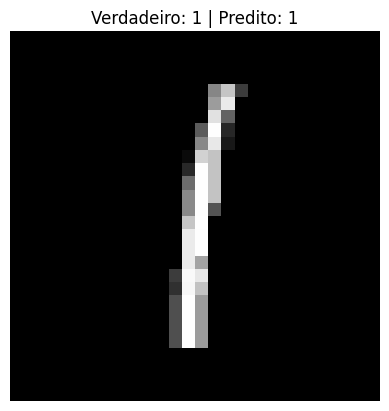

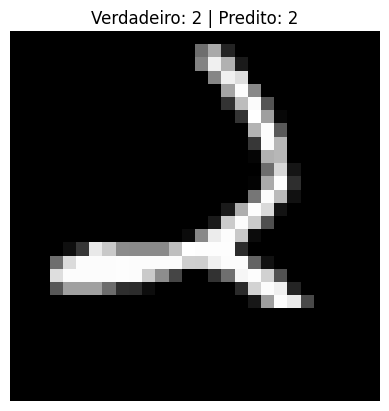

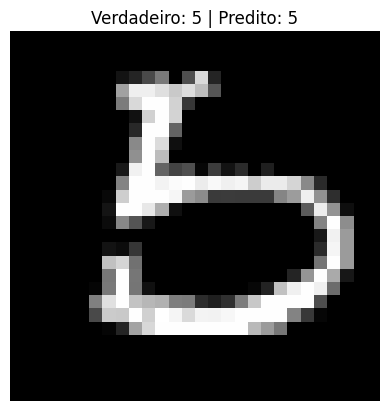

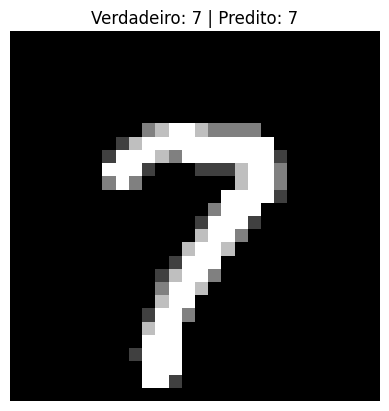

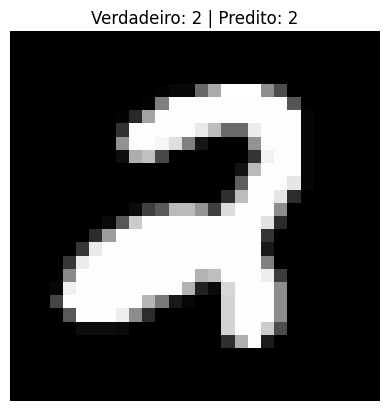

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Pegar algumas amostras do conjunto de teste
num_samples = 5
indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Fazer predições
predictions = model.predict(sample_images)

# Mostrar imagens e predições
for i in range(num_samples):
    plt.imshow(sample_images[i].reshape(28,28), cmap="gray")
    plt.title(f"Verdadeiro: {sample_labels[i]} | Predito: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()
